### Haemopoietic Stem Cell Transplantation Patient Survival Rate

### Data Importing and Cleaning

In [1]:
### Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the  data

df = pd.read_csv("data_file\\train.csv")
df.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


### Description of each column

In [3]:
import pandas as pd

# Creating the dictionary with column names and descriptions
data = {    "Variable": [        "dri_score", "psych_disturb", "cyto_score", "diabetes", "hla_match_c_high",         "hla_high_res_8", "tbi_status", "arrhythmia", "hla_low_res_6", "graft_type",         "vent_hist", "renal_issue", "pulm_severe", "prim_disease_hct", "hla_high_res_6",         "cmv_status", "hla_high_res_10", "hla_match_dqb1_high", "tce_imm_match", "hla_nmdp_6",         "hla_match_c_low", "rituximab", "hla_match_drb1_low", "hla_match_dqb1_low", "prod_type",        "cyto_score_detail", "conditioning_intensity", "ethnicity", "year_hct", "obesity",        "mrd_hct", "in_vivo_tcd", "tce_match", "hla_match_a_high", "hepatic_severe",        "donor_age", "prior_tumor", "hla_match_b_low", "peptic_ulcer", "age_at_hct",        "hla_match_a_low", "gvhd_proph", "rheum_issue", "sex_match", "hla_match_b_high",        "race_group", "comorbidity_score", "karnofsky_score", "hepatic_mild", "tce_div_match",        "donor_related", "melphalan_dose", "hla_low_res_8", "cardiac", "hla_match_drb1_high",        "pulm_moderate", "hla_low_res_10", "efs", "efs_time"    ],    "Description": [        "Refined disease risk index", "Psychiatric disturbance", "Cytogenetic score", "Diabetes", "Recipient / 1st donor allele level (high resolution) matching at HLA-C", "Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-C,-DRB1", "TBI", "Arrhythmia", "Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-DRB1", "Graft type", "History of mechanical ventilation", "Renal, moderate / severe",         "Pulmonary, severe", "Primary disease for HCT", "Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-DRB1",        "Donor/recipient CMV serostatus", "Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-C,-DRB1,-DQB1",        "Recipient / 1st donor allele level (high resolution) matching at HLA-DQB1",        "T-cell epitope immunogenicity/diversity match", "Recipient / 1st donor matching at HLA-A(lo),-B(lo),-DRB1(hi)",        "Recipient / 1st donor antigen level (low resolution) matching at HLA-C", "Rituximab given in conditioning",        "Recipient / 1st donor antigen level (low resolution) matching at HLA-DRB1",        "Recipient / 1st donor antigen level (low resolution) matching at HLA-DQB1", "Product type",        "Cytogenetics for DRI (AML/MDS)", "Computed planned conditioning intensity", "Ethnicity",        "Year of HCT", "Obesity", "MRD at time of HCT (AML/ALL)", "In-vivo T-cell depletion (ATG/alemtuzumab)",        "T-cell epitope matching", "Recipient / 1st donor allele level (high resolution) matching at HLA-A",        "Hepatic, moderate / severe", "Donor age", "Solid tumor, prior",        "Recipient / 1st donor antigen level (low resolution) matching at HLA-B", "Peptic ulcer",        "Age at HCT", "Recipient / 1st donor antigen level (low resolution) matching at HLA-A",        "Planned GVHD prophylaxis", "Rheumatologic", "Donor/recipient sex match",        "Recipient / 1st donor allele level (high resolution) matching at HLA-B", "Race",        "Sorror comorbidity score", "KPS at HCT", "Hepatic, mild","T-cell epitope matching", "Related vs. unrelated donor", "Melphalan dose (mg/m^2)", "Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-C,-DRB1", "Cardiac", "Recipient / 1st donor allele level (high resolution) matching at HLA-DRB1","Pulmonary, moderate", "Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-C,-DRB1","Event-free survival", "Time to event-free survival, months"    ]}

description = pd.DataFrame(data)
# Display full dataframe without column width truncation
pd.set_option('display.max_colwidth', None)

description

,Variable,Description
0,dri_score,Refined disease risk index
1,psych_disturb,Psychiatric disturbance
2,cyto_score,Cytogenetic score
3,diabetes,Diabetes
4,hla_match_c_high,Recipient / 1st donor allele level (high resolution) matching at HLA-C
5,hla_high_res_8,"Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-C,-DRB1"
6,tbi_status,TBI
7,arrhythmia,Arrhythmia
8,hla_low_res_6,"Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-DRB1"
9,graft_type,Graft type


In [4]:
df.shape

(28800, 60)

In [5]:
df.size

1728000

In [6]:
df.isnull().sum()

ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

In [7]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage[missing_percentage > 20])

cyto_score           28.013889
hla_high_res_8       20.239583
hla_high_res_10      24.871528
tce_imm_match        38.656250
cyto_score_detail    41.399306
mrd_hct              57.628472
tce_match            65.958333
tce_div_match        39.569444
dtype: float64


### Creating a Copy

In [8]:
df_new = df.copy()



#### Data Wrangling - data cleaning

In [9]:
df_new = df_new.replace('?', np.nan)

In [10]:
df_new[['cyto_score', 'cyto_score_detail']] = df_new[['cyto_score', 'cyto_score_detail']].replace(np.nan, 'TBD')
df_new['cyto_score'].value_counts()

cyto_score
TBD             9409
Poor            8802
Intermediate    6376
Favorable       3011
Normal           643
Other            504
Not tested        55
Name: count, dtype: int64

In [11]:
df_new = df_new.drop_duplicates()



In [12]:
## Dropping ID columns along with columns which have greater 50% null values and Irrelevant columns
df_new = df_new.drop(columns = ['ID', 'mrd_hct', 'tce_match'], axis = 1)
df_new.shape

(28800, 57)

In [13]:
## dropping null rows
df_new = df_new.dropna(axis = 0)

In [14]:
df_new.shape

(9566, 57)

In [15]:
df_new[['prod_type', 'graft_type']].value_counts()

prod_type  graft_type      
PB         Peripheral blood    7458
BM         Bone marrow         1645
           Peripheral blood     242
PB         Bone marrow          221
Name: count, dtype: int64

In [16]:
df_new['cyto_score_detail'].value_counts()

cyto_score_detail
Intermediate    4638
TBD             3156
Poor            1365
Favorable        368
Not tested        39
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

# Grouping and counting unique values
x = df_new[['tce_imm_match']].value_counts()

y = df_new[['tce_div_match']].value_counts()

print(x)
print()
print(y)


tce_imm_match
P/P              7314
G/G              1283
H/H               561
G/B               242
H/B               103
P/H                35
P/B                21
P/G                 7
Name: count, dtype: int64

tce_div_match                
Permissive mismatched            7343
GvH non-permissive               1270
HvG non-permissive                694
Bi-directional non-permissive     259
Name: count, dtype: int64


In [18]:
#df_new[['tce_div_match', 'tce_imm_match']].value_counts()

In [19]:
#df = df.drop(columns = ['ID'], axis = 1)

# Uncomment this to drop

### Data Exporation and Visualization

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9566 entries, 1 to 28796
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dri_score               9566 non-null   object 
 1   psych_disturb           9566 non-null   object 
 2   cyto_score              9566 non-null   object 
 3   diabetes                9566 non-null   object 
 4   hla_match_c_high        9566 non-null   float64
 5   hla_high_res_8          9566 non-null   float64
 6   tbi_status              9566 non-null   object 
 7   arrhythmia              9566 non-null   object 
 8   hla_low_res_6           9566 non-null   float64
 9   graft_type              9566 non-null   object 
 10  vent_hist               9566 non-null   object 
 11  renal_issue             9566 non-null   object 
 12  pulm_severe             9566 non-null   object 
 13  prim_disease_hct        9566 non-null   object 
 14  hla_high_res_6          9566 non-null   floa

In [21]:
df_new.describe()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,...,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000
mean,1.797512,7.000418,5.268660,5.202906,8.779532,1.779114,5.275141,1.789985,1.773469,1.821660,...,44.084264,1.735103,1.730295,2.032302,81.853439,7.058645,1.751098,8.880305,0.620322,20.333447
std,0.403692,1.521067,1.161571,1.185165,1.850221,0.419377,1.141977,0.408621,0.418609,0.386623,...,18.606768,0.442484,0.446179,2.147441,11.042088,1.510656,0.436251,1.806706,0.485332,23.073550
min,0.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.044000,0.000000,0.000000,0.000000,40.000000,3.000000,0.000000,4.000000,0.000000,0.711000
25%,2.000000,6.000000,5.000000,4.000000,8.000000,2.000000,5.000000,2.000000,2.000000,2.000000,...,33.751500,1.000000,1.000000,0.000000,70.000000,7.000000,2.000000,8.000000,0.000000,5.499000
50%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,48.210000,2.000000,2.000000,2.000000,90.000000,8.000000,2.000000,10.000000,1.000000,7.707500
75%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,60.481250,2.000000,2.000000,3.000000,90.000000,8.000000,2.000000,10.000000,1.000000,30.388000
max,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,73.726000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,1.000000,156.819000


In [22]:
hla = df_new[['hla_high_res_6','hla_high_res_8', 'hla_high_res_10', 'hla_low_res_6', 'hla_low_res_8','hla_low_res_10','hla_match_dqb1_high','hla_match_dqb1_low','hla_match_drb1_high','hla_match_drb1_low','hla_match_c_high','hla_match_c_low','hla_match_a_high','hla_match_a_low','hla_match_b_high','hla_match_b_low','efs', 'efs_time']]

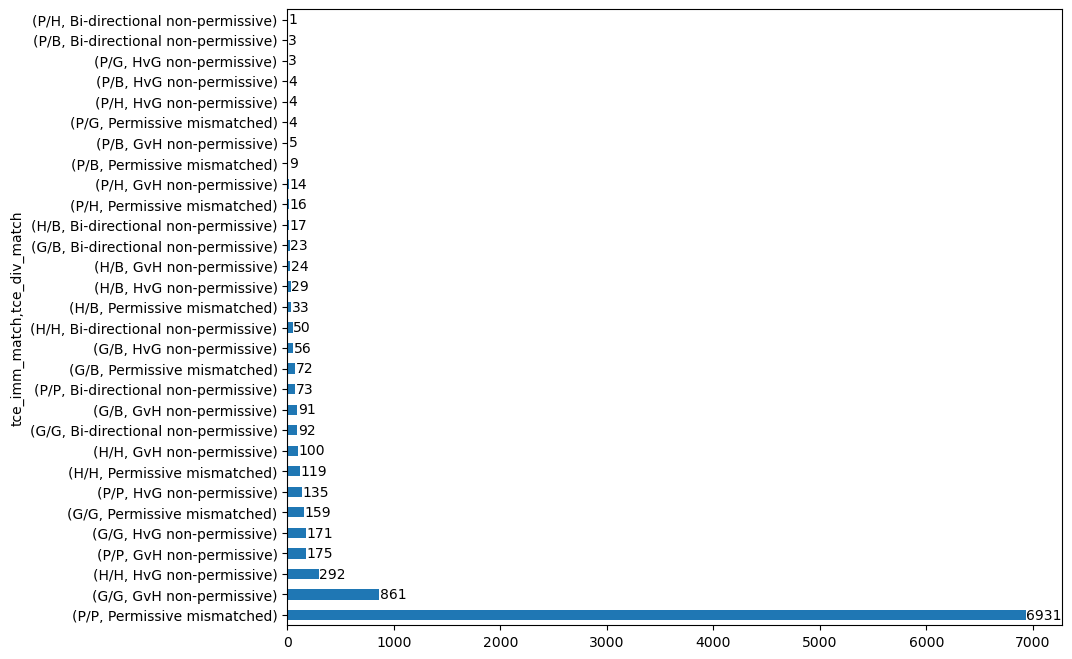

In [23]:
plt.figure(figsize = (10, 8))
df_new[['tce_imm_match', 'tce_div_match']].value_counts().plot(kind = 'barh')

#x = df[['tce_imm_match', 'tce_div_match', 'tce_match']].groupby(['tce_imm_match', 'tce_div_match', 'tce_match'])['tce_match'].count()
for index, value in enumerate(df_new[['tce_imm_match', 'tce_div_match']].value_counts()):
    plt.text(value + 5, index, str(value), va='center')  

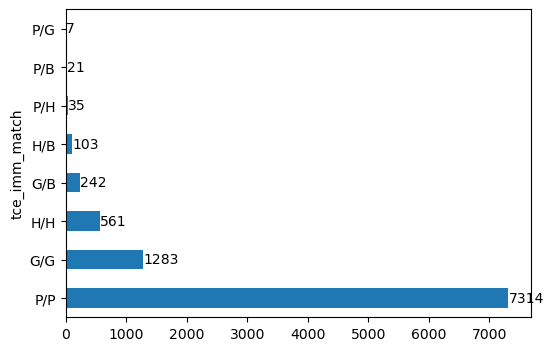

In [24]:
plt.figure(figsize = (6, 4))
df_new['tce_imm_match'].value_counts(ascending = False).plot(kind = 'barh')
for index, value in enumerate(df_new['tce_imm_match'].value_counts()):
    plt.text(value + 5, index, str(value), va='center')  


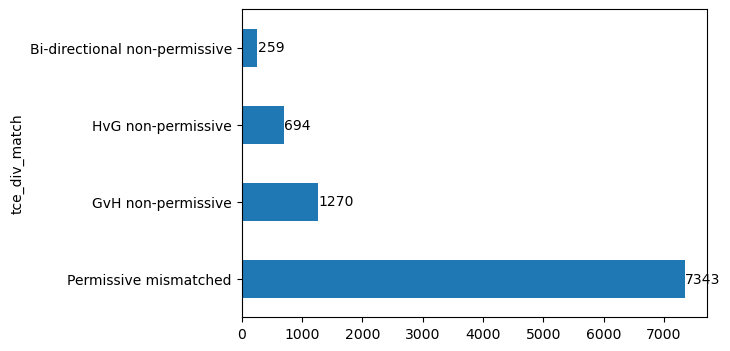

In [25]:
plt.figure(figsize = (6, 4))
df_new['tce_div_match'].value_counts().plot(kind = 'barh')
for index, value in enumerate(df_new['tce_div_match'].value_counts()):
    plt.text(value + 5, index, str(value), va='center')  

In [26]:
#hla.head()

In [27]:
"""plt.figure(figsize = (12,12))
sns.heatmap( hla.corr(), annot = True, center = 0, fmt = '.2f', cmap = 'Blues')

plt.show()"""

"plt.figure(figsize = (12,12))\nsns.heatmap( hla.corr(), annot = True, center = 0, fmt = '.2f', cmap = 'Blues')\n\nplt.show()"

In [28]:
#sns.pairplot(hla, hue='efs', palette='Set2')

In [29]:
df_new['efs'].value_counts()

efs
1.0    5934
0.0    3632
Name: count, dtype: int64

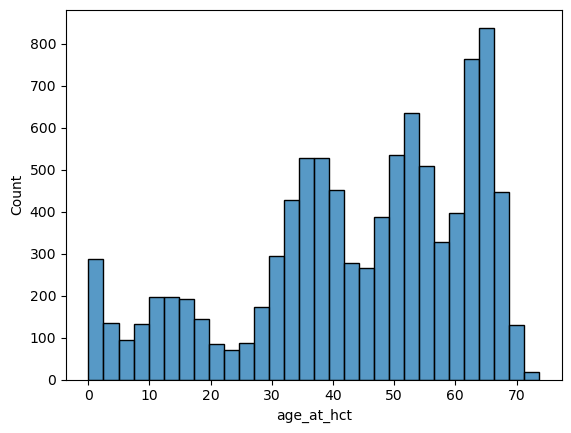

In [30]:
### Distribution plot for age at transplantation
sns.histplot(data = df_new, x = 'age_at_hct')
plt.show()

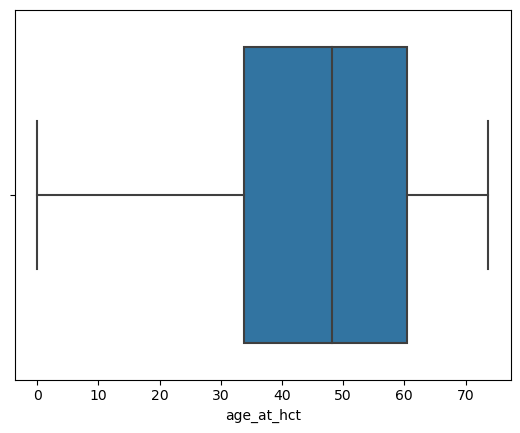

In [31]:
### box plot for age at transplantation
sns.boxplot(data = df_new, x= 'age_at_hct')
plt.show()

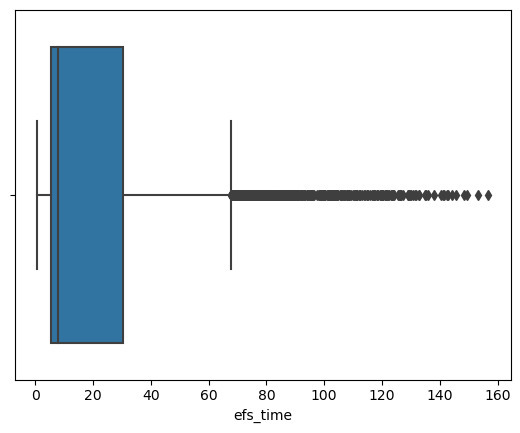

In [32]:
### box plot for event free survival time taken
sns.boxplot(data = df_new, x= 'efs_time')
plt.show()

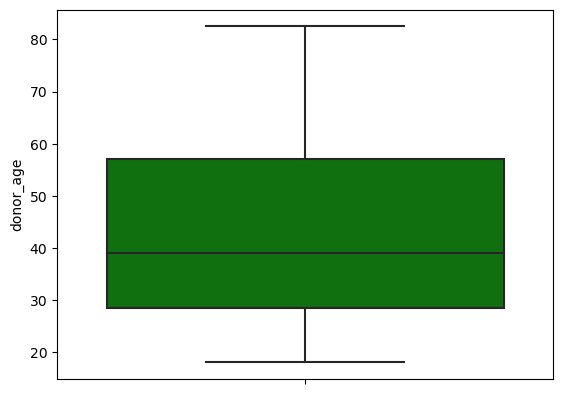

In [33]:
sns.boxplot(data = df_new, y= 'donor_age', color = 'green')
plt.show()

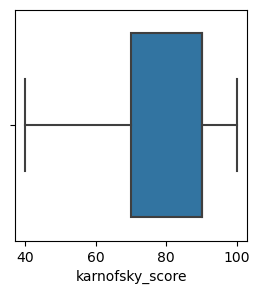

In [34]:
#comorbidity_score	karnofsky_score
plt.figure(figsize = (3, 3))
sns.boxplot(data = df_new, x = 'karnofsky_score')
plt.show()

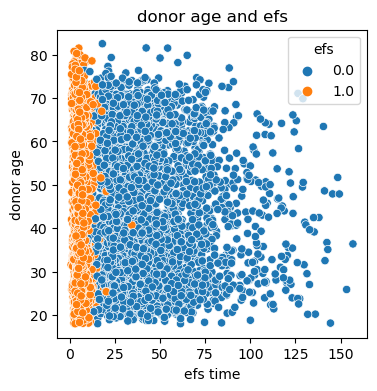

In [35]:
plt.figure(figsize = (4, 4))

sns.scatterplot(data = df_new, x= 'efs_time', y = 'donor_age', hue = 'efs')
plt.title("donor age and efs")
plt.xlabel("efs time")
plt.ylabel("donor age")

plt.show()

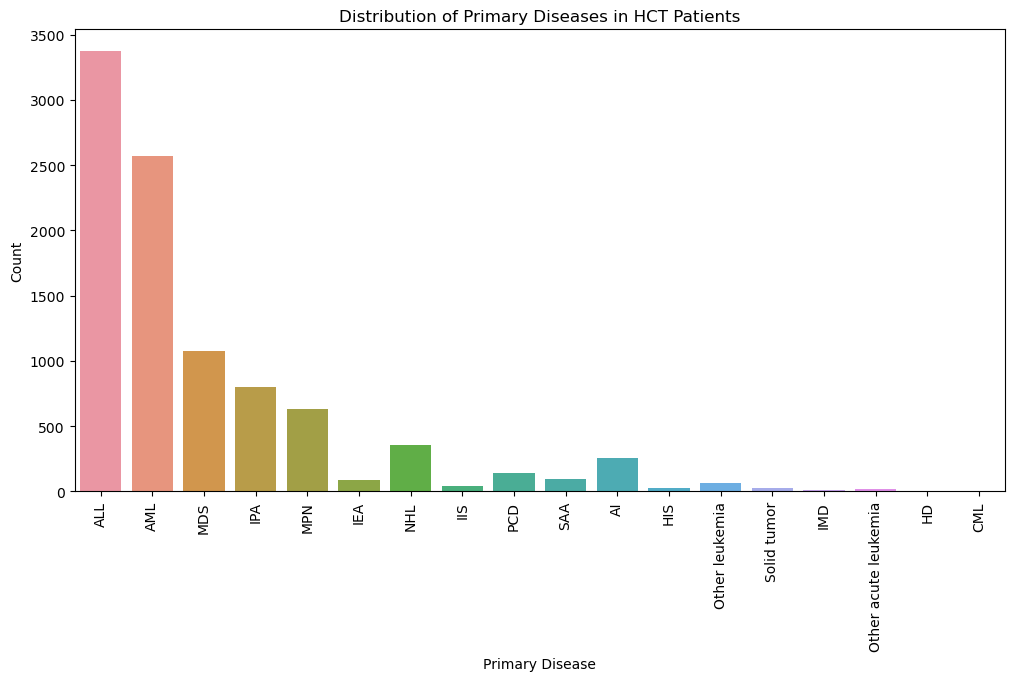

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, x="prim_disease_hct", order=df["prim_disease_hct"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Primary Diseases in HCT Patients")
plt.xlabel("Primary Disease")
plt.ylabel("Count")
plt.show()

#### efs times  have less than 20 hours in most cases where efs = 1 ....graft rejection

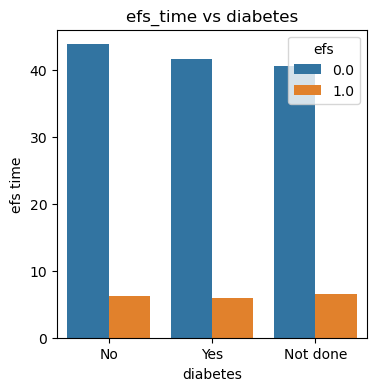

In [37]:
plt.figure(figsize = (4, 4))

sns.barplot(data = df_new, x= 'diabetes', y = 'efs_time', hue = 'efs', ci = None)
plt.title("efs_time vs diabetes")
plt.xlabel("diabetes")
plt.ylabel("efs time")
plt.show()

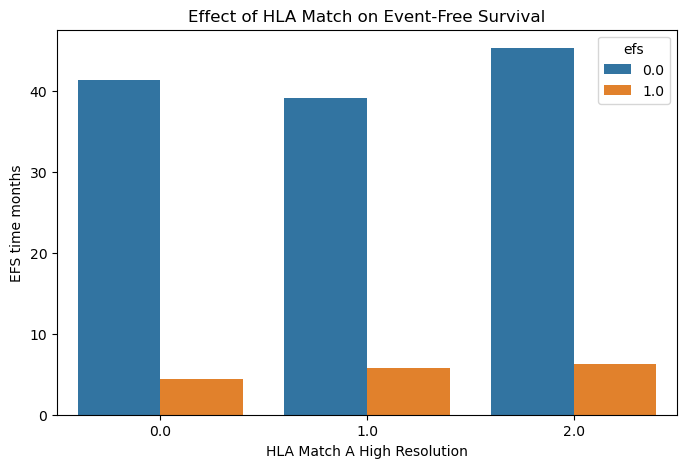

In [38]:
### Effect of hla_match_ahigh on survival chances

plt.figure(figsize=(8, 5))
sns.barplot(data = df_new, x = "hla_match_a_high", y = 'efs_time', hue="efs", ci=None)
plt.title("Effect of HLA Match on Event-Free Survival")
plt.xlabel("HLA Match A High Resolution")
plt.ylabel("EFS time months")
plt.show()


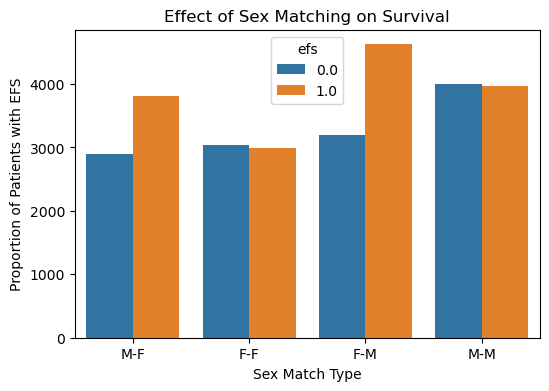

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex_match", hue = 'efs')
plt.title("Effect of Sex Matching on Survival")
plt.xlabel("Sex Match Type")
plt.ylabel("Proportion of Patients with EFS")
plt.show()


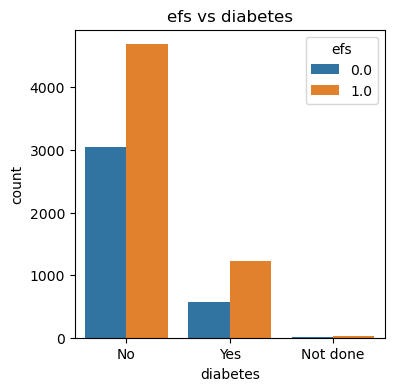

In [40]:
plt.figure(figsize = (4, 4))


ax = sns.countplot(data = df_new, x= 'diabetes', hue = 'efs')

plt.title("efs vs diabetes")
plt.xlabel("diabetes")
plt.ylabel("count")
plt.show()

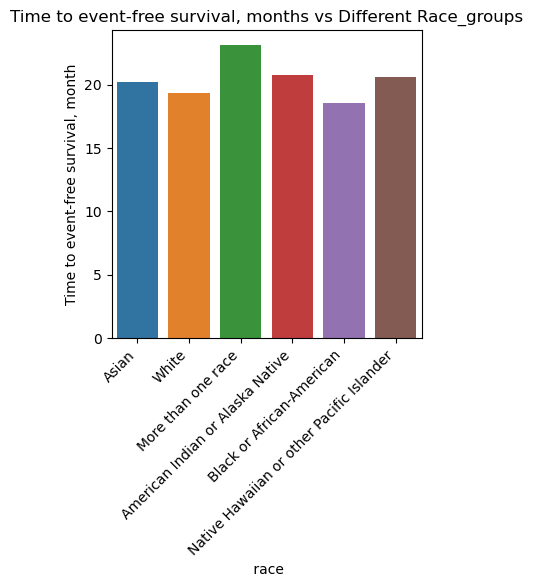

In [41]:
plt.figure(figsize = (4, 4))


sns.barplot(data = df_new, x= 'race_group', y = 'efs_time',  ci=None)


plt.title("Time to event-free survival, months vs Different Race_groups")
plt.xlabel(" race")
plt.ylabel("Time to event-free survival, month")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

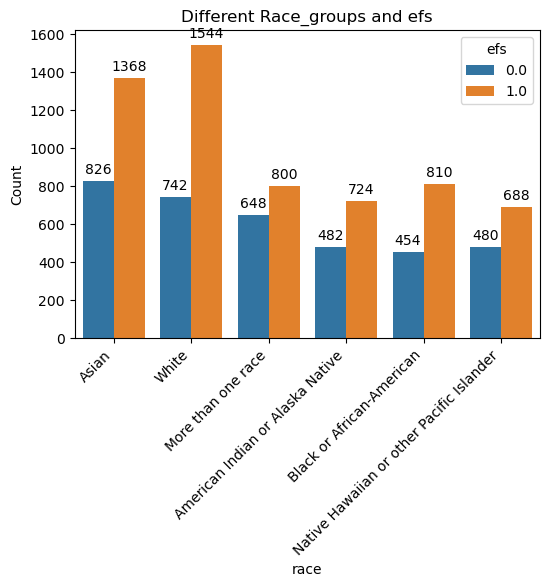

In [42]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(data=df_new, x='race_group', hue='efs')

plt.title("Different Race_groups and efs")
plt.xlabel("race")
plt.ylabel("Count")
plt.xticks(rotation=45, ha= 'right')

ax.bar_label(ax.containers[0], label_type='edge', padding=3)
ax.bar_label(ax.containers[1], label_type='edge', padding=3)
plt.show()


In [43]:
df_new['efs'].value_counts()  ## target value imbalance should do strtification whil training

efs
1.0    5934
0.0    3632
Name: count, dtype: int64

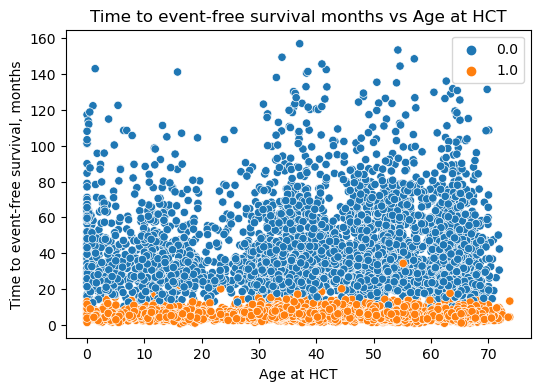

In [44]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df_new, x='age_at_hct', y='efs_time', hue='efs')
plt.title("Time to event-free survival months vs Age at HCT")
plt.xlabel("Age at HCT")
plt.ylabel("Time to event-free survival, months")
plt.legend()

plt.show()

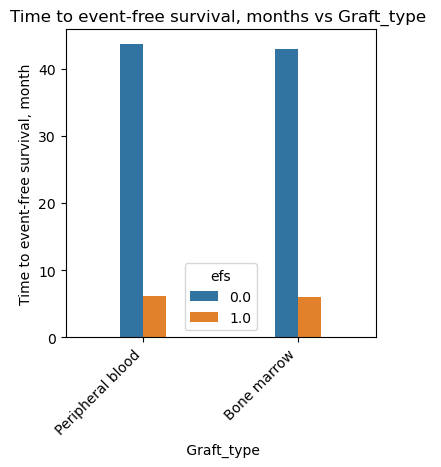

In [45]:
plt.figure(figsize = (4, 4))

sns.barplot(data = df_new, x= 'graft_type', y = 'efs_time', hue = 'efs', width = 0.3, ci=None)
plt.title("Time to event-free survival, months vs Graft_type ")
plt.xlabel(" Graft_type")
plt.ylabel("Time to event-free survival, month")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

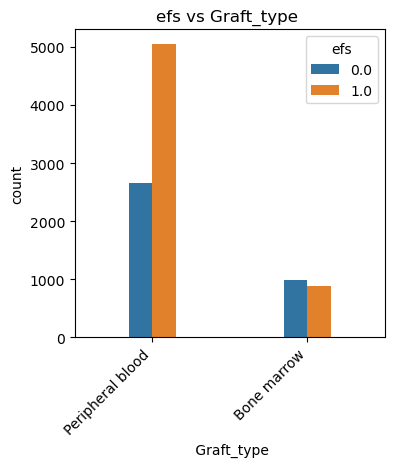

In [46]:
### Count plot for 

plt.figure(figsize = (4, 4))

sns.countplot(data = df_new, x= 'graft_type', hue = 'efs', width = 0.3)

plt.title("efs vs Graft_type ")
plt.xlabel(" Graft_type")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [47]:
x= """plt.figure(figsize = (4, 4))sns.barplot(data = df, x= 'prod_type', y = 'efs_time', width = 0.3, ci=None)plt.title("Time to event-free survival, months vs Graft_type ")plt.xlabel(" Graft_type")plt.ylabel("Time to event-free survival, month")plt.xticks(rotation = 45, ha = 'right')plt.show()"""

In [48]:
df_new[['efs', 'comorbidity_score', 'karnofsky_score', 'efs_time']].corr()

,efs,comorbidity_score,karnofsky_score,efs_time
efs,1.000000,0.139366,-0.059468,-0.784130
comorbidity_score,0.139366,1.000000,-0.137000,-0.147067
karnofsky_score,-0.059468,-0.137000,1.000000,0.079546
efs_time,-0.784130,-0.147067,0.079546,1.000000


In [49]:
#df_copy = df_copy.drop(columns = ['cyto_score', 'tce_imm_match', 'cyto_score_detail', 'mrd_hct', 'tce_match', 'tce_div_match'])

In [50]:
df_new.shape

(9566, 57)

In [51]:
categorical_columns = df_new.select_dtypes(include = ['object'])
categorical_columns.shape

(9566, 33)

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encode = LabelEncoder()

for col in categorical_columns.columns:
        categorical_columns[col] = label_encode.fit_transform(categorical_columns[col])
        
categorical_columns = categorical_columns.astype('float64')
categorical_columns.head()

,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,...,gvhd_proph,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate
1,2.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,...,13.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,3.0,5.0,2.0,3.0,2.0,1.0,0.0,0.0
5,0.0,0.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,7.0,0.0,0.0,5.0,0.0,3.0,1.0,1.0,0.0,2.0
6,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,3.0,3.0,0.0,3.0,2.0,1.0,0.0,2.0
10,2.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.0,0.0,3.0,5.0,0.0,3.0,2.0,1.0,2.0,0.0


In [53]:
categorical_columns['tbi_status'].value_counts()

tbi_status
0.0    6399
1.0    1907
5.0     632
6.0     567
2.0      17
3.0      16
4.0      15
7.0      13
Name: count, dtype: int64

In [54]:
"""
Yes_no_Missing = df[['psych_disturb', 'diabetes', 'arrhythmia', 'prior_tumor', 'rituximab', 'renal_issue', 'obesity', 'pulm_severe', 'pulm_moderate', 'hepatic_severe', 'hepatic_mild', 'rheum_issue', 'peptic_ulcer','vent_hist']]
for i in Yes_no_Missing.columns:
    Yes_no_Missing[i]= Yes_no_Missing[i].replace(np.nan, "Missing")    
Yes_no_Missing.isnull().sum()"""
      

'\nYes_no_Missing = df[[\'psych_disturb\', \'diabetes\', \'arrhythmia\', \'prior_tumor\', \'rituximab\', \'renal_issue\', \'obesity\', \'pulm_severe\', \'pulm_moderate\', \'hepatic_severe\', \'hepatic_mild\', \'rheum_issue\', \'peptic_ulcer\',\'vent_hist\']]\nfor i in Yes_no_Missing.columns:\n    Yes_no_Missing[i]= Yes_no_Missing[i].replace(np.nan, "Missing")    \nYes_no_Missing.isnull().sum()'

<Figure size 1200x1200 with 0 Axes>

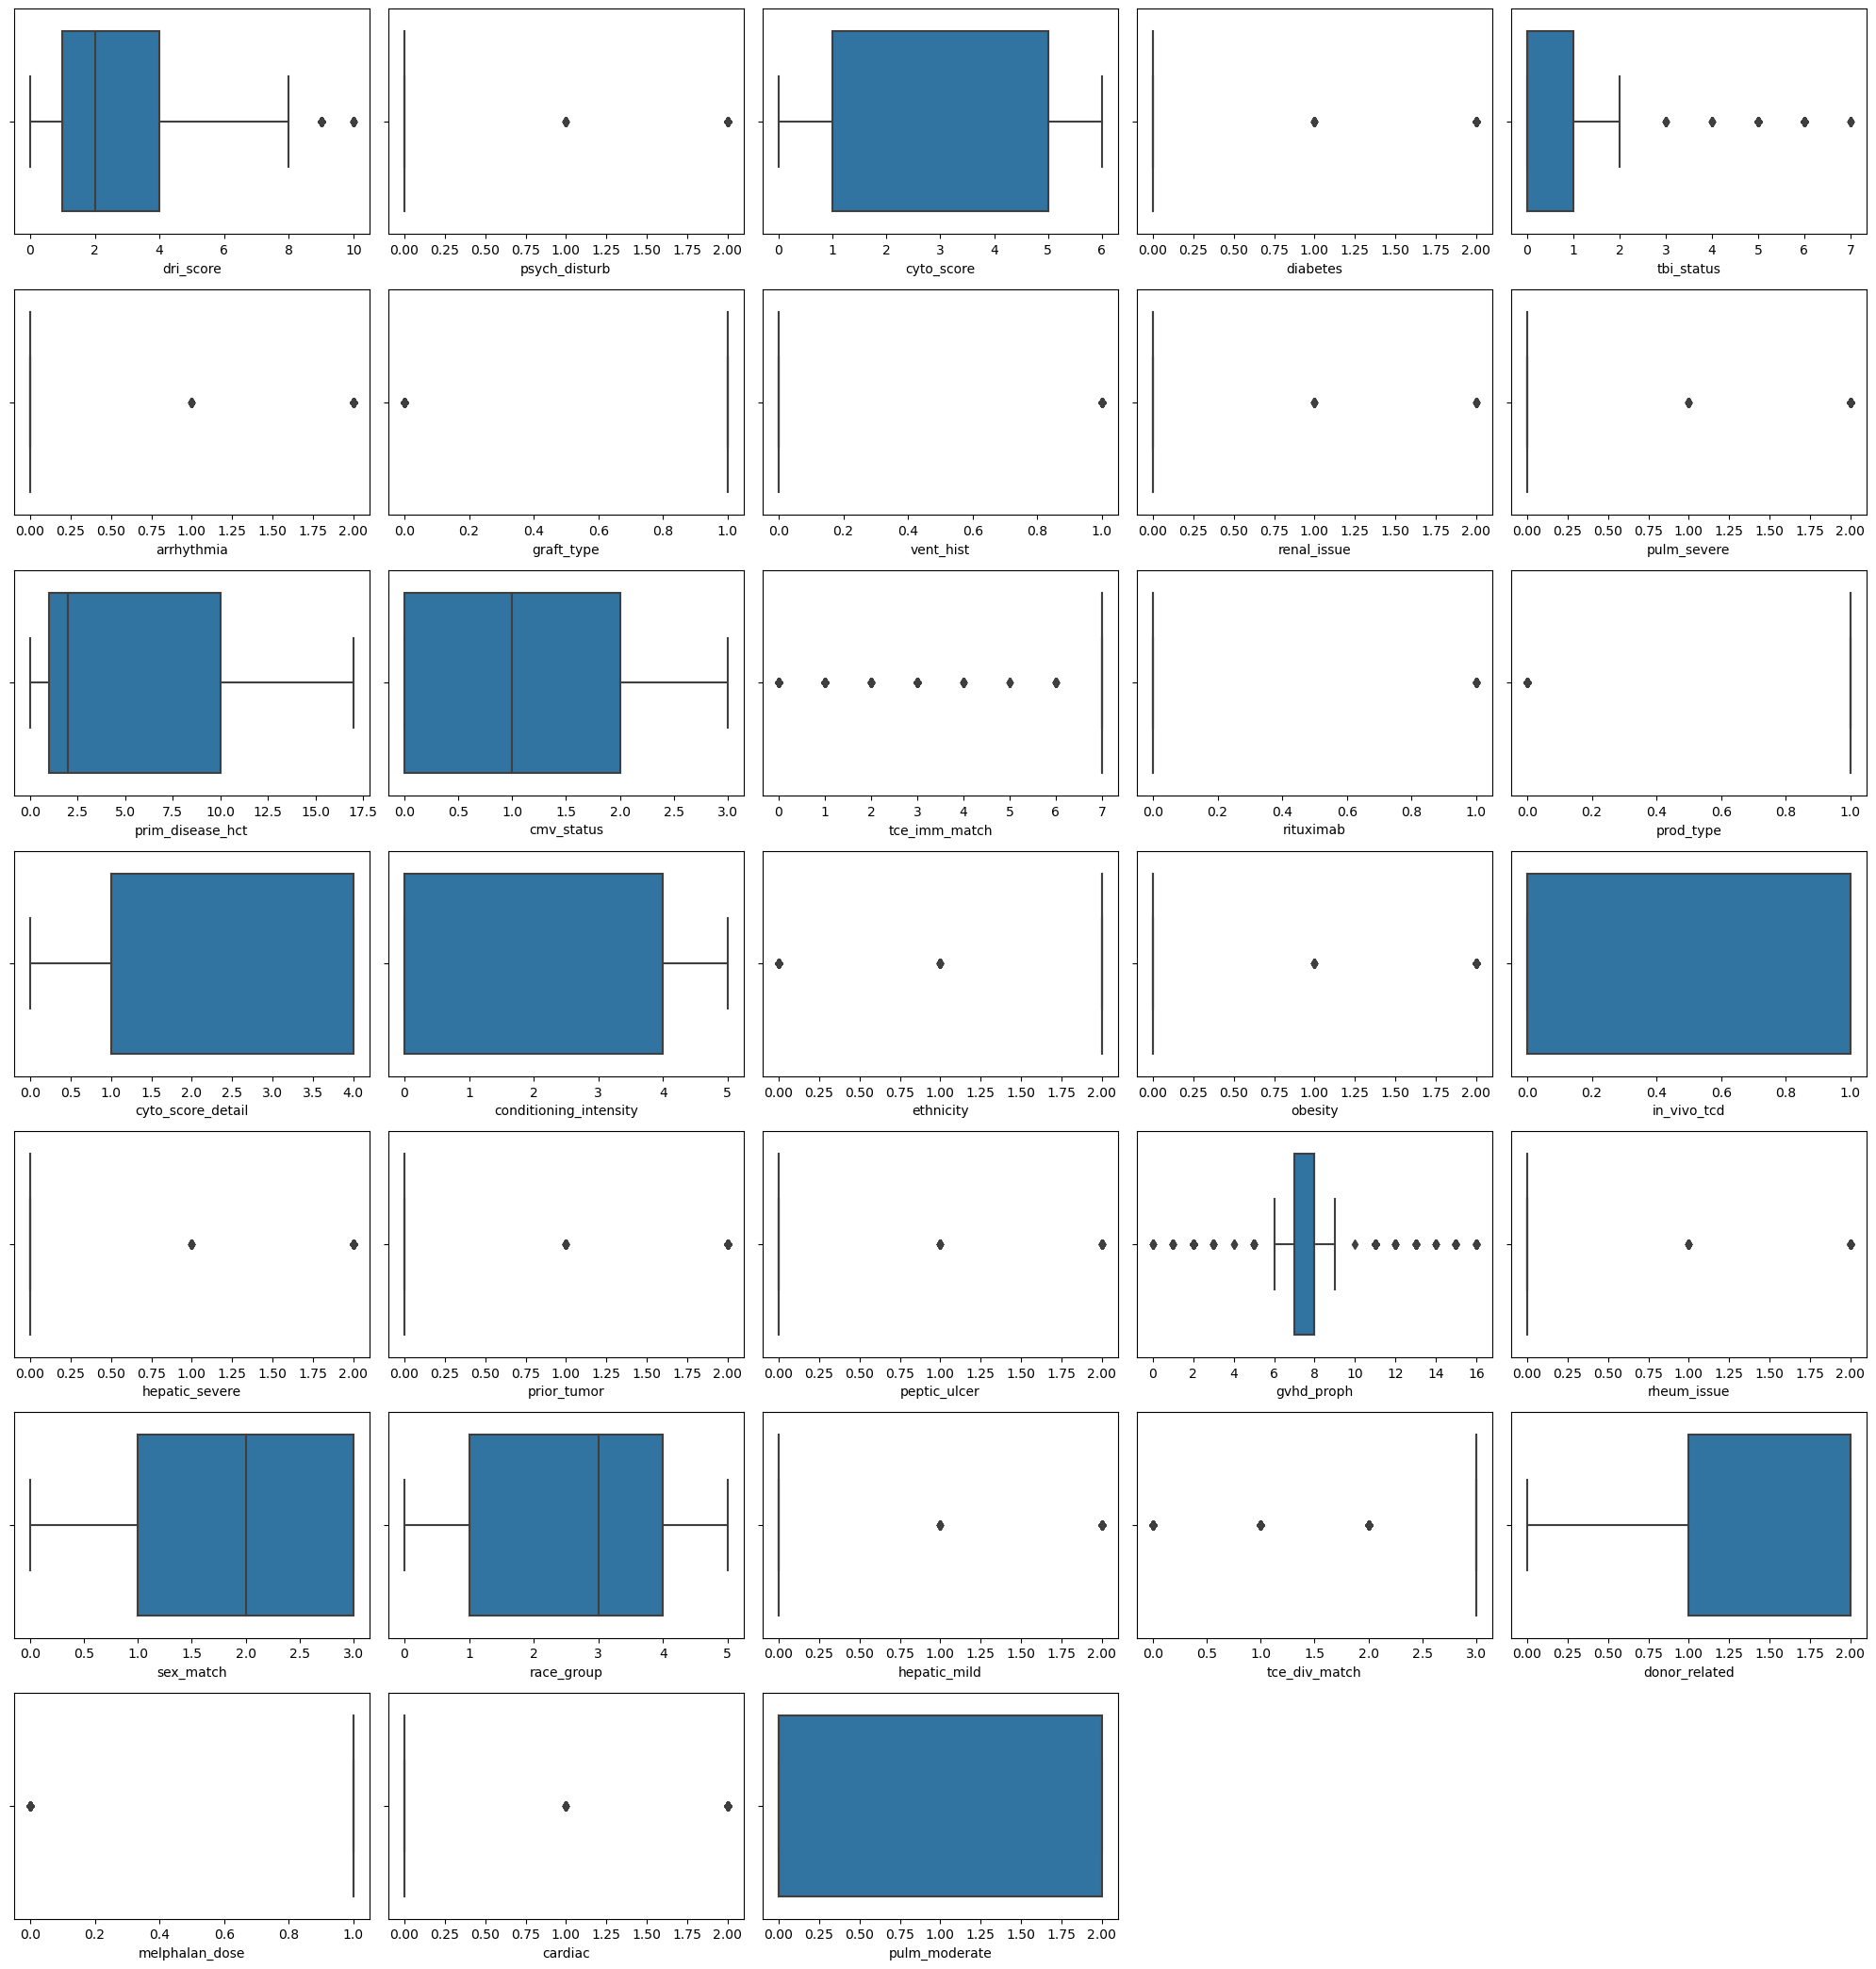

In [55]:
cat_list = categorical_columns.columns
plt.figure(figsize = (12, 12))

total_boxes = len(cat_list)
n_cols = 5  
n_rows = (total_boxes + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

# Iterates over the categorical columns
for i, col in enumerate(cat_list):
    # Calculate the row and column indices for the current subplot
    row_idx = i // n_cols
    col_idx = i % n_cols

    # Create a boxplot for the current column
    sns.boxplot(data=categorical_columns, x=col, ax=axs[row_idx, col_idx])

for i in range(total_boxes, n_rows * n_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    axs[row_idx, col_idx].axis('off')

# Layout so plots do not overlap
plt.tight_layout()

plt.show()
    

<Axes: xlabel='tce_imm_match'>

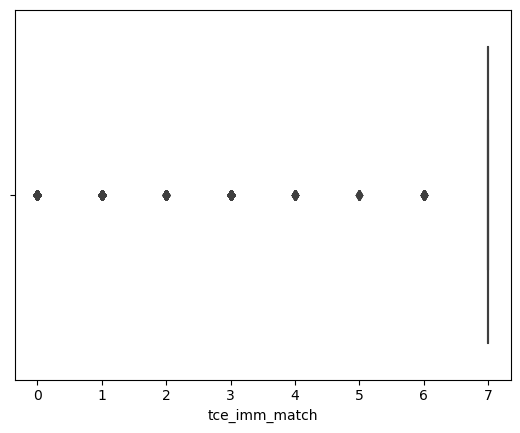

In [56]:
sns.boxplot(x = categorical_columns['tce_imm_match'])

In [57]:
numerical_columns = df_new.select_dtypes(include=['number'])

In [58]:
numerical_columns.shape

(9566, 24)

In [59]:
## Combining both numerical and categorical Dataframe
df_concat = pd.concat([categorical_columns, numerical_columns], axis = 1)

In [60]:
df_concat.shape

(9566, 57)

In [61]:
df_concat.describe()

,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,...,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000,9566.000000
mean,2.954631,0.250470,3.315179,0.380201,0.909680,0.119381,0.804934,0.026552,0.009931,0.146770,...,44.084264,1.735103,1.730295,2.032302,81.853439,7.058645,1.751098,8.880305,0.620322,20.333447
std,2.821994,0.659632,2.304538,0.782199,1.808731,0.470751,0.396272,0.160779,0.130965,0.517133,...,18.606768,0.442484,0.446179,2.147441,11.042088,1.510656,0.436251,1.806706,0.485332,23.073550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.044000,0.000000,0.000000,0.000000,40.000000,3.000000,0.000000,4.000000,0.000000,0.711000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,33.751500,1.000000,1.000000,0.000000,70.000000,7.000000,2.000000,8.000000,0.000000,5.499000
50%,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,48.210000,2.000000,2.000000,2.000000,90.000000,8.000000,2.000000,10.000000,1.000000,7.707500
75%,4.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,60.481250,2.000000,2.000000,3.000000,90.000000,8.000000,2.000000,10.000000,1.000000,30.388000
max,10.000000,2.000000,6.000000,2.000000,7.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,73.726000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,1.000000,156.819000


In [62]:
df_num = numerical_columns

df_cat = pd.concat([categorical_columns, df['efs']], axis = 1)

In [63]:
correlated_vars = df_num.corr()[abs(df_num.corr()) >= 0.8].stack().index.tolist()
correlated_vars = [tuple for tuple in correlated_vars if tuple[0] != tuple[1]]
len(correlated_vars)

142

In [ ]:
### Heatmap for numerical columns

plt.figure(figsize = (12, 12))
sns.heatmap(df_num.corr(),annot = True, fmt = '.1f', cmap = 'Blues')

In [ ]:
## Finding values correlted > 0.75

### Heatmap for numerical columns
corr_matrix = df_num.corr()

high_corr_matrix = corr_matrix[corr_matrix >= 0.75]

plt.figure(figsize = (12, 12))
sns.heatmap(high_corr_matrix,annot = True, fmt = '.1f', cmap = 'Blues')

In [ ]:


cat_corr = df_cat.corr()[abs(df_cat.corr()) >= 0.8].stack().index.tolist()
correlated_vars = [tuple for tuple in cat_corr if tuple[0] != tuple[1]]
correlated_vars

In [ ]:
### Heatmap for categorical columns


plt.figure(figsize = (18, 16))
sns.heatmap(df_cat.corr(),annot = True, fmt = '.1f', cmap = 'Oranges')
plt.show()

In [ ]:
### Finding Outliers in each column
"""
df_num.columns

df_filtered = df_num.copy()

for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 - Q1
    L_bound = Q1 - 1.5 * IQR
    U_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[i] >= L_bound) & (df_filtered[i] <= U_bound) ]

df_filtered.shape"""

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [ ]:
## Changed StandardScaler to robustscaler

scaler = RobustScaler()
y = df_concat['efs']
X = df_concat.drop(columns = ['efs'], axis = 1)
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
y.value_counts()

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier



xgb_classifier= XGBClassifier(n_estimators = 2, max_depth= 2, learning_rate=0.3, objective='binary:logistic')

xgb_classifier.fit(X_train, y_train)

print(f"Test accuracy_score for xgboost: {xgb_classifier.score(X_test, y_test):.3f}")

xgb_test_pred = xgb_classifier.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, xgb_test_pred)}")

xgb_train_pred = xgb_classifier.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, xgb_train_pred)}")


In [ ]:
print(classification_report(y_test, xgb_test_pred))


In [ ]:
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
import shap

explainer = shap.Explainer(xgb_classifier, X_train)
shap_values = explainer(X_test)


In [ ]:

shap.summary_plot(shap_values, X_test)

In [ ]:
## Using scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify = y, random_state = 42)


In [ ]:
from xgboost import XGBClassifier



xgb_class= XGBClassifier(n_estimators = 2, max_depth= 2, learning_rate=0.3, objective='binary:logistic')

xgb_class.fit(X_train, y_train)

print(f"Test accuracy_score for xgboost: {xgb_class.score(X_test, y_test):.3f}")

xgb_test_pred = xgb_class.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, xgb_test_pred)}")

xgb_train_pred = xgb_class.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, xgb_train_pred)}")


explainer = shap.Explainer(xgb_class)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
import shap
print(classification_report(y_test, xgb_test_pred))




In [ ]:
explainer = shap.Explainer(xgb_class, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:

pca  = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()



In [ ]:
components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

print(f"number of components to retain 95% variance: {components}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify = y)

# Train a model (Random Forest as an example)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
explainer = shap.Explainer(model_rf, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [ ]:
explainer = shap.Explainer(model_rf, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=[f'PC{i+1}' for i in range(X_pca.shape[1])])




In [ ]:
print(X_train.shape)
print(X_test.shape)

### Testing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(n_estimators = 100, random_state = 42)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9, None],     # 'None' for unlimited depth
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 3, 5] 
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(rfe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.3f}")

In [ ]:

"""feature_names = X_pca.columns

importances = best_rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False) """


In [ ]:


"""top_features = feature_imp_df['Feature'].tolist()
top_20 = top_features[:20]
top_20"""

In [ ]:
"""plt.figure(figsize=(18, 10))
plt.bar(feature_imp_df['Feature'], feature_imp_df['Importance'], color='green')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Importance')
plt.gca()  
plt.xticks(rotation = 45, ha = 'right')
plt.show()"""

In [ ]:
#df_copy = df_copy.drop(columns = [ 'tce_imm_match', 'cyto_score_detail', 'mrd_hct', 'tce_match', 'tce_div_match'])

In [ ]:
"""
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 5))

plt.bar(X_scaled.columns, importances

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation = 45, ha = 'right')
plt.show()
"""

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(recall_score(y_test, y_pred))

In [ ]:
y_train_pred = best_rf_model.predict(X_train)
y_train_pred

In [ ]:
## Checking the performance on training vs test data
print("Testing accuracy score: ", accuracy_score(y_test, y_pred))

print("Training accuracy score: ", accuracy_score(y_train, y_train_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

labels = ["Event Occurred", "Event-Free"]

cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
cmd.plot()

In [ ]:
y_probs = best_rf_model.predict_proba(X_test)
print(np.round(y_probs[:5], 2))

In [ ]:
y_pred = best_rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

### Decision Tree Classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
### Using the PCA reduced data to split and train the model
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42, stratify = y)


In [ ]:

scores = cross_val_score(dtc, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Cross-validation mean score:", scores.mean())

print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(scores, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {scores.mean()* 100:.2f}%')


In [ ]:


#dtc.fit(X_train, y_train)
#y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 4, 7] 
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

model = grid_search.best_estimator_

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

model.fit(X_train, y_train)

y_new_pred = model.predict(X_test)
print("Accuracy score of the best Decision Tree classifier:", accuracy_score(y_test, y_new_pred))

In [ ]:
print("Accuracy score of the best Decision Tree classifier:", accuracy_score(y_test, y_new_pred))

In [ ]:
print("Classification report for Decision Tree: ")
print(classification_report(y_test, y_new_pred))

In [ ]:
print("Decision Tree Classifier confusion_matrix: ")

labels = ["Event Occurred", "Event-Free"]

cm = confusion_matrix(y_test, y_new_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
cm_plot.plot()

## Trying Boosting Methods

#### ADABOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier


In [ ]:
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42, stratify = y)

abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
abc.fit(X_train, y_train)

print(f"AdaBoost Accuracy: {abc.score(X_test, y_test):.3f}")

In [ ]:
y_ad_pred = abc.predict(X_test)

y_train_pred = abc.predict(X_train)

print("Accuracy score on test data: ", accuracy_score(y_test, y_ad_pred))
print("Accuracy score on training data: ", accuracy_score(y_train, y_train_pred))

In [ ]:
labels = ["Event Occurred", "Event-Free"]

cm = confusion_matrix(y_test, y_ad_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
cm_plot.plot()

#### GRADIENTBOOST

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42, stratify = y)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

print(f"Gradient Boosting Testing Accuracy score: {gbc.score(X_test, y_test):.3f}")


In [ ]:
y_gd_pred = gbc.predict(X_test)
print(f"Gradient Boosting Testing Accuracy score: {accuracy_score(y_test, y_gd_pred):.3f}")

y_gd_pred_train = gbc.predict(X_train)
print(f"Gradient Boosting Training Accuracy score: {accuracy_score(y_train, y_gd_pred_train):.3f}")

In [ ]:
print("Classification score for gradient boosting:  ")
print(classification_report(y_test, y_gd_pred))

In [ ]:
print("Gradient boosting confusion_matrix: ")

cm = confusion_matrix(y_test, y_gd_pred)
new_cm = ConfusionMatrixDisplay(confusion_matrix = cm)

new_cm.plot()

#### XGBOOST

In [ ]:
from xgboost import XGBClassifier

xgb= XGBClassifier(n_estimators = 7, max_depth=6, learning_rate=1, objective='binary:logistic')

xgb.fit(X_train, y_train)

print(f"Test accuracy_scorefor xgboost: {xgb.score(X_test, y_test):.3f}")

xgb_test_pred = xgb.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, xgb_test_pred)}")

xgb_train_pred = xgb.predict(X_train)
print(f"Train accuracy: {accuracy_score(y_train, xgb_train_pred)}")


In [ ]:
print("XGBOOST Classifier confusion_matrix: ")

labels = ["Event Occurred", "Event-Free"]

cm = confusion_matrix(y_test, xgb_test_pred)

cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
cm_plot.plot()

In [ ]:
import xgboost
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)
